# 📊 Phase 3C: Model Preparation

---

## Objectives

1. ✅ Load and validate final engineered dataset (79 features)
2. ✅ Perform feature selection and remove redundant features
3. ✅ Create train/test split (80/20) with stratification
4. ✅ Scale numerical features using StandardScaler
5. ✅ Validate data quality (no missing values, no data leakage)
6. ✅ Save model-ready datasets and preprocessing pipeline

---

**Part of:** Feature Engineering & Model Preparation (Phase 3)

**Prerequisites:** Phase 3B (Advanced Features) - Requires `features_advanced_engineered.csv`

**Next:** Phase 4 - Churn Prediction Modeling

---

## 1. Environment Setup

In [60]:
# Data Manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib

# Utilities
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Configuration
np.random.seed(42)
pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 2)

# Visualization styling
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.size'] = 10

print("✅ Environment configured successfully!")

✅ Environment configured successfully!


## 2. Load Data

In [61]:
# Define paths
project_root = Path('/Users/mihiniboteju/churn-prediction-project')
data_path = project_root / 'data' / 'processed' / 'features_advanced_engineered.csv'
processed_path = project_root / 'data' / 'processed'
viz_path = project_root / 'visualizations' / 'figures'
models_path = project_root / 'models'

# Create directories if they don't exist
processed_path.mkdir(parents=True, exist_ok=True)
viz_path.mkdir(parents=True, exist_ok=True)
models_path.mkdir(parents=True, exist_ok=True)

# Load Phase 3B output
df = pd.read_csv(data_path)

print(f"📊 Data loaded: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"💾 Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"🎯 Churn rate: {df['Churn'].mean() * 100:.2f}%")
print(f"\n📋 Input from Phase 3B: {df.shape[1]} columns (21 original + 58 engineered)")

📊 Data loaded: 7,043 rows × 79 columns
💾 Memory usage: 8.98 MB
🎯 Churn rate: 26.54%

📋 Input from Phase 3B: 79 columns (21 original + 58 engineered)


## 3. Data Overview & Quality Check

In [62]:
print("📊 DATASET OVERVIEW")
print("="*80)

print(f"\nShape: {df.shape}")
print(f"\nData types:")
print(df.dtypes.value_counts())

print(f"\n🔍 Missing values:")
missing = df.isnull().sum()
if missing.sum() == 0:
    print("  ✅ No missing values found")
else:
    print(missing[missing > 0])

print(f"\n🔍 Infinite values:")
inf_count = np.isinf(df.select_dtypes(include=[np.number])).sum().sum()
if inf_count == 0:
    print("  ✅ No infinite values found")
else:
    print(f"  ⚠️  Found {inf_count} infinite values")

print(f"\n📋 First 3 rows:")
df.head(3)

📊 DATASET OVERVIEW

Shape: (7043, 79)

Data types:
int64      55
object     13
float64     7
bool        4
Name: count, dtype: int64

🔍 Missing values:
revenue_per_month    11
dtype: int64

🔍 Infinite values:
  ✅ No infinite values found

📋 First 3 rows:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,contract_encoded,contract_risk_score,has_internet,is_fiber,is_dsl,payment_Bank transfer (automatic),payment_Credit card (automatic),payment_Electronic check,payment_Mailed check,is_auto_payment,is_electronic_check,OnlineSecurity_binary,OnlineBackup_binary,DeviceProtection_binary,TechSupport_binary,StreamingTV_binary,StreamingMovies_binary,MultipleLines_binary,tenure_group,tenure_group_encoded,is_new_customer,price_segment,price_segment_encoded,is_high_price,TotalCharges_log,avg_monthly_spend,total_services,security_services_count,entertainment_services_count,has_any_services,is_fully_engaged,has_security_bundle,has_premium_protection,has_security_gap,has_partial_security,is_likely_household,family_size_indicator,is_heavy_streaming,projected_24m_value,revenue_per_month,loyalty_value_score,mtm_new_customer,mtm_mid_tenure,long_contract_loyal,fiber_mtm_risk,fiber_long_contract,high_price_no_services,high_price_full_services,new_customer_high_price,echeck_no_autopay,paperless_no_autopay,senior_no_support,single_minimal_services,is_flight_risk,is_value_at_risk,needs_retention,upsell_opportunity,premium_retention_target
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0,0,2,1,0,1,False,False,True,False,0,1,0,1,0,0,0,0,0,0-12m,0,1,low,0,0,3.43,14.93,1,1,0,1,0,0,0,0,1,1,1,0,716.4,29.85,14.93,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0,1,1,1,0,1,False,False,False,True,0,0,1,0,1,0,0,0,0,25-36m,2,0,medium,1,0,7.54,53.99,2,2,0,1,0,0,0,0,1,0,0,0,1366.8,55.57,1835.51,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,3668-QPYBK,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1,0,2,1,0,1,False,False,False,True,0,0,1,1,0,0,0,0,0,0-12m,0,1,medium,1,0,4.69,36.05,2,2,0,1,0,1,0,0,1,0,0,0,1292.4,54.08,72.10,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [64]:
# Fix missing values in revenue_per_month (caused by division by zero when tenure=0)
if 'revenue_per_month' in df.columns and df['revenue_per_month'].isnull().sum() > 0:
    print("🔧 FIXING MISSING VALUES IN REVENUE_PER_MONTH")
    print("="*80)
    
    missing_count = df['revenue_per_month'].isnull().sum()
    print(f"\n⚠️  Found {missing_count} missing values in 'revenue_per_month'")
    print("   • Cause: Division by zero when tenure=0 (new customers)")
    print("   • Solution: For tenure=0, set revenue_per_month = MonthlyCharges")
    
    # Check if they're all tenure=0 cases
    missing_mask = df['revenue_per_month'].isnull()
    print(f"\n   • Customers with missing revenue_per_month:")
    print(f"     - With tenure=0: {(df[missing_mask]['tenure'] == 0).sum()}")
    print(f"     - With tenure>0: {(df[missing_mask]['tenure'] > 0).sum()}")
    
    # Fix: For new customers (tenure=0), revenue_per_month should equal MonthlyCharges
    df.loc[missing_mask, 'revenue_per_month'] = df.loc[missing_mask, 'MonthlyCharges']
    
    print(f"\n✅ Fixed: Set revenue_per_month = MonthlyCharges for {missing_count} customers with tenure=0")
    print(f"✅ Remaining missing values: {df['revenue_per_month'].isnull().sum()}")
    print("="*80 + "\n")
else:
    print("✅ No missing values found in revenue_per_month\n")

✅ No missing values found in revenue_per_month



## 4. Feature Identification & Selection

In [65]:
print("🔧 Identifying feature types...\n")

# Identify columns to remove (non-predictive and string columns)
cols_to_remove = ['customerID'] if 'customerID' in df.columns else []

# Also remove any remaining string columns (should have been encoded in previous phases)
string_cols = df.select_dtypes(include=['object']).columns.tolist()
string_cols = [col for col in string_cols if col != 'Churn']  # Keep Churn if it's string
cols_to_remove.extend([col for col in string_cols if col not in cols_to_remove])

# Separate target variable
target_col = 'Churn'

# All feature columns (excluding target and non-predictive/string columns)
feature_cols = [col for col in df.columns if col != target_col and col not in cols_to_remove]

print(f"✅ Total columns: {len(df.columns)}")
print(f"✅ Target variable: {target_col}")
print(f"✅ Feature columns: {len(feature_cols)}")
if cols_to_remove:
    print(f"✅ Columns to remove: {len(cols_to_remove)} - {', '.join(cols_to_remove[:5])}{'...' if len(cols_to_remove) > 5 else ''}")
else:
    print(f"✅ No columns to remove")

print(f"\n📋 Feature columns ({len(feature_cols)} total):")
for i, col in enumerate(feature_cols[:20], 1):  # Show first 20
    print(f"{i:2d}. {col}")
if len(feature_cols) > 20:
    print(f"... and {len(feature_cols) - 20} more")

🔧 Identifying feature types...

✅ Total columns: 79
✅ Target variable: Churn
✅ Feature columns: 65
✅ Columns to remove: 13 - customerID, MultipleLines, InternetService, OnlineSecurity, OnlineBackup...

📋 Feature columns (65 total):
 1. gender
 2. SeniorCitizen
 3. Partner
 4. Dependents
 5. tenure
 6. PhoneService
 7. PaperlessBilling
 8. MonthlyCharges
 9. TotalCharges
10. contract_encoded
11. contract_risk_score
12. has_internet
13. is_fiber
14. is_dsl
15. payment_Bank transfer (automatic)
16. payment_Credit card (automatic)
17. payment_Electronic check
18. payment_Mailed check
19. is_auto_payment
20. is_electronic_check
... and 45 more


In [66]:
# Identify numerical vs binary/categorical features
# Exclude object/string columns - they should not be in the model
numerical_features = []
binary_features = []

for col in feature_cols:
    # Skip string columns (they should have been encoded in previous phases)
    if df[col].dtype == 'object':
        continue
    
    unique_vals = df[col].nunique()
    if unique_vals == 2 and set(df[col].unique()).issubset({0, 1}):
        binary_features.append(col)
    elif df[col].dtype in ['int64', 'float64'] and unique_vals > 2:
        numerical_features.append(col)
    else:
        binary_features.append(col)  # Treat as categorical/binary

print("📊 FEATURE CATEGORIZATION")
print("="*80)
print(f"\n✅ Numerical features (to be scaled): {len(numerical_features)}")
for feat in numerical_features:
    print(f"   • {feat}")

print(f"\n✅ Binary/Categorical features (no scaling): {len(binary_features)}")
for feat in binary_features[:10]:  # Show first 10
    print(f"   • {feat}")
if len(binary_features) > 10:
    print(f"   ... and {len(binary_features) - 10} more")
    
print(f"\n⚠️  Note: Object/string columns excluded from features (should be encoded in previous phases)")

📊 FEATURE CATEGORIZATION

✅ Numerical features (to be scaled): 16
   • tenure
   • MonthlyCharges
   • TotalCharges
   • contract_encoded
   • contract_risk_score
   • tenure_group_encoded
   • price_segment_encoded
   • TotalCharges_log
   • avg_monthly_spend
   • total_services
   • security_services_count
   • entertainment_services_count
   • family_size_indicator
   • projected_24m_value
   • revenue_per_month
   • loyalty_value_score

✅ Binary/Categorical features (no scaling): 49
   • gender
   • SeniorCitizen
   • Partner
   • Dependents
   • PhoneService
   • PaperlessBilling
   • has_internet
   • is_fiber
   • is_dsl
   • payment_Bank transfer (automatic)
   ... and 39 more

⚠️  Note: Object/string columns excluded from features (should be encoded in previous phases)


## 5. Check for Multicollinearity

In [67]:
print("🔍 Checking for highly correlated features (correlation > 0.95)...\n")

# Calculate correlation matrix for numerical features only
if len(numerical_features) > 1:
    corr_matrix = df[numerical_features].corr().abs()
    
    # Find pairs with high correlation
    high_corr_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            if corr_matrix.iloc[i, j] > 0.95:
                high_corr_pairs.append((
                    corr_matrix.columns[i],
                    corr_matrix.columns[j],
                    corr_matrix.iloc[i, j]
                ))
    
    if high_corr_pairs:
        print(f"⚠️  Found {len(high_corr_pairs)} highly correlated pairs:")
        for feat1, feat2, corr in high_corr_pairs:
            print(f"   • {feat1} ↔ {feat2}: {corr:.3f}")
        print("\n💡 Recommendation: Consider removing one feature from each pair in Phase 4 if needed")
    else:
        print("✅ No highly correlated feature pairs found (correlation > 0.95)")
else:
    print("⚠️  Only one numerical feature, skipping correlation check")

🔍 Checking for highly correlated features (correlation > 0.95)...

⚠️  Found 11 highly correlated pairs:
   • MonthlyCharges ↔ price_segment_encoded: 0.959
   • MonthlyCharges ↔ avg_monthly_spend: 0.956
   • MonthlyCharges ↔ projected_24m_value: 1.000
   • MonthlyCharges ↔ revenue_per_month: 0.996
   • TotalCharges ↔ loyalty_value_score: 1.000
   • contract_encoded ↔ contract_risk_score: 1.000
   • price_segment_encoded ↔ projected_24m_value: 0.959
   • price_segment_encoded ↔ revenue_per_month: 0.955
   • avg_monthly_spend ↔ projected_24m_value: 0.956
   • avg_monthly_spend ↔ revenue_per_month: 0.959
   • projected_24m_value ↔ revenue_per_month: 0.996

💡 Recommendation: Consider removing one feature from each pair in Phase 4 if needed


## 6. Prepare Features and Target

In [68]:
# Separate features and target
# Only use numeric features (exclude object/string columns)
numeric_feature_cols = numerical_features + binary_features
X = df[numeric_feature_cols].copy()
y = df[target_col].copy()

print("📊 FEATURES AND TARGET PREPARED")
print("="*80)
print(f"\n✅ Features (X): {X.shape}")
print(f"✅ Target (y): {y.shape}")
print(f"✅ Numeric features used: {len(numeric_feature_cols)}")
print(f"\n🎯 Target distribution:")
print(f"   • Class 0 (No Churn): {(y == 0).sum():,} ({(y == 0).mean() * 100:.2f}%)")
print(f"   • Class 1 (Churn): {(y == 1).sum():,} ({(y == 1).mean() * 100:.2f}%)")
print(f"   • Imbalance ratio: {(y == 0).sum() / (y == 1).sum():.2f}:1")

📊 FEATURES AND TARGET PREPARED

✅ Features (X): (7043, 65)
✅ Target (y): (7043,)
✅ Numeric features used: 65

🎯 Target distribution:
   • Class 0 (No Churn): 5,174 (73.46%)
   • Class 1 (Churn): 1,869 (26.54%)
   • Imbalance ratio: 2.77:1


## 7. Train/Test Split

In [69]:
print("🔧 Creating train/test split...\n")

# Split with stratification to maintain class balance
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    random_state=42,
    stratify=y
)

print("✅ TRAIN/TEST SPLIT COMPLETE")
print("="*80)
print(f"\n📊 Training set:")
print(f"   • X_train: {X_train.shape}")
print(f"   • y_train: {y_train.shape}")
print(f"   • Churn rate: {y_train.mean() * 100:.2f}%")

print(f"\n📊 Test set:")
print(f"   • X_test: {X_test.shape}")
print(f"   • y_test: {y_test.shape}")
print(f"   • Churn rate: {y_test.mean() * 100:.2f}%")

print(f"\n✅ Stratification successful: Churn rate maintained in both sets")
print(f"   • Overall: {y.mean() * 100:.2f}%")
print(f"   • Train: {y_train.mean() * 100:.2f}%")
print(f"   • Test: {y_test.mean() * 100:.2f}%")

🔧 Creating train/test split...

✅ TRAIN/TEST SPLIT COMPLETE

📊 Training set:
   • X_train: (5634, 65)
   • y_train: (5634,)
   • Churn rate: 26.54%

📊 Test set:
   • X_test: (1409, 65)
   • y_test: (1409,)
   • Churn rate: 26.54%

✅ Stratification successful: Churn rate maintained in both sets
   • Overall: 26.54%
   • Train: 26.54%
   • Test: 26.54%


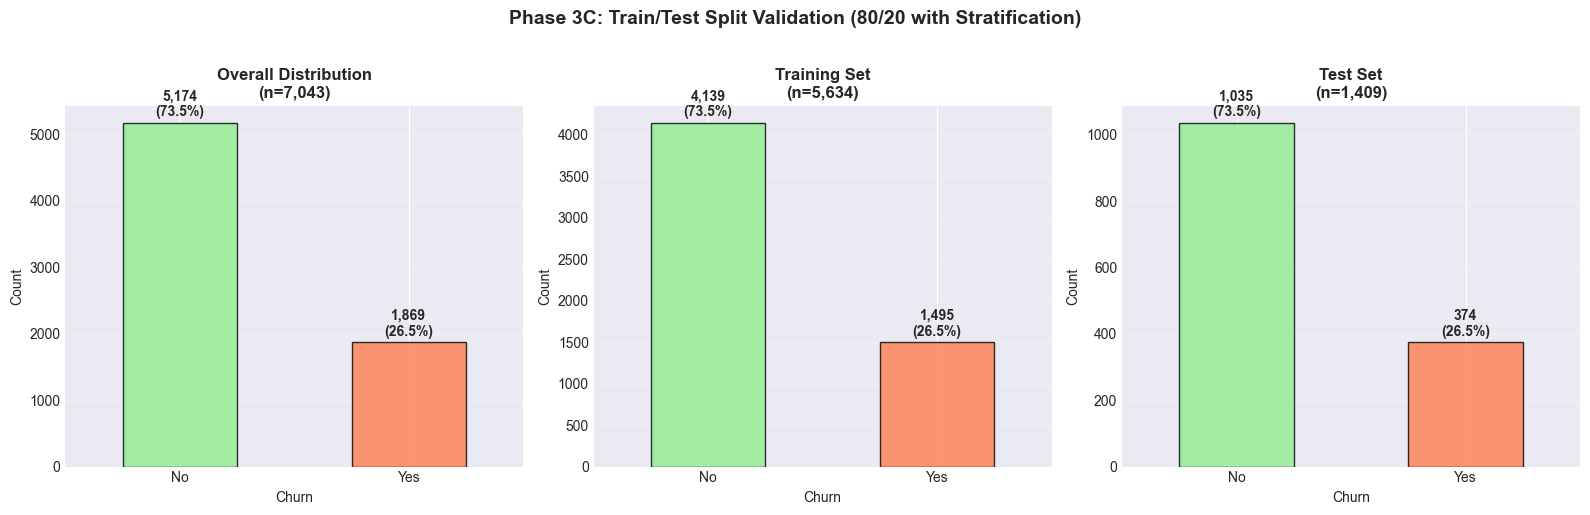

✅ Visualization saved: 19_train_test_split_validation.png


In [70]:
# Visualize train/test split
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Plot 1: Overall distribution
y.value_counts().sort_index().plot(kind='bar', ax=axes[0], color=['lightgreen', 'coral'], 
                                     edgecolor='black', alpha=0.8)
axes[0].set_title(f'Overall Distribution\n(n={len(y):,})', fontweight='bold', fontsize=12)
axes[0].set_xlabel('Churn')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(['No', 'Yes'], rotation=0)
axes[0].grid(axis='y', alpha=0.3)
for i, v in enumerate(y.value_counts().sort_index()):
    axes[0].text(i, v + 100, f'{v:,}\n({v/len(y)*100:.1f}%)', ha='center', fontweight='bold')

# Plot 2: Train distribution
y_train.value_counts().sort_index().plot(kind='bar', ax=axes[1], color=['lightgreen', 'coral'], 
                                          edgecolor='black', alpha=0.8)
axes[1].set_title(f'Training Set\n(n={len(y_train):,})', fontweight='bold', fontsize=12)
axes[1].set_xlabel('Churn')
axes[1].set_ylabel('Count')
axes[1].set_xticklabels(['No', 'Yes'], rotation=0)
axes[1].grid(axis='y', alpha=0.3)
for i, v in enumerate(y_train.value_counts().sort_index()):
    axes[1].text(i, v + 80, f'{v:,}\n({v/len(y_train)*100:.1f}%)', ha='center', fontweight='bold')

# Plot 3: Test distribution
y_test.value_counts().sort_index().plot(kind='bar', ax=axes[2], color=['lightgreen', 'coral'], 
                                         edgecolor='black', alpha=0.8)
axes[2].set_title(f'Test Set\n(n={len(y_test):,})', fontweight='bold', fontsize=12)
axes[2].set_xlabel('Churn')
axes[2].set_ylabel('Count')
axes[2].set_xticklabels(['No', 'Yes'], rotation=0)
axes[2].grid(axis='y', alpha=0.3)
for i, v in enumerate(y_test.value_counts().sort_index()):
    axes[2].text(i, v + 20, f'{v:,}\n({v/len(y_test)*100:.1f}%)', ha='center', fontweight='bold')

plt.suptitle('Phase 3C: Train/Test Split Validation (80/20 with Stratification)', 
             fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig(viz_path / '19_train_test_split_validation.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Visualization saved: 19_train_test_split_validation.png")

## 8. Feature Scaling

In [71]:
print("🔧 Scaling numerical features...\n")

# Initialize StandardScaler
scaler = StandardScaler()

# Fit on training data only (prevent data leakage)
scaler.fit(X_train[numerical_features])

# Transform both train and test
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numerical_features] = scaler.transform(X_train[numerical_features])
X_test_scaled[numerical_features] = scaler.transform(X_test[numerical_features])

print("✅ FEATURE SCALING COMPLETE")
print("="*80)
print(f"\n✅ Scaled {len(numerical_features)} numerical features")
print(f"✅ Binary/categorical features unchanged: {len(binary_features)}")
print(f"\n📊 Scaling statistics (from training data):")
print(f"   • Features scaled to: mean ≈ 0, std ≈ 1")
print(f"   • Scaler fitted on: {X_train.shape[0]:,} training samples")
print(f"   • Applied to: {X_train.shape[0]:,} train + {X_test.shape[0]:,} test samples")

🔧 Scaling numerical features...

✅ FEATURE SCALING COMPLETE

✅ Scaled 16 numerical features
✅ Binary/categorical features unchanged: 49

📊 Scaling statistics (from training data):
   • Features scaled to: mean ≈ 0, std ≈ 1
   • Scaler fitted on: 5,634 training samples
   • Applied to: 5,634 train + 1,409 test samples


In [72]:
# Verify scaling worked correctly
print("\n🔍 Verifying scaling (first 5 numerical features):")
print("="*80)

verify_features = numerical_features[:5]
for feat in verify_features:
    train_mean = X_train_scaled[feat].mean()
    train_std = X_train_scaled[feat].std()
    print(f"\n{feat}:")
    print(f"   • Original range: [{X_train[feat].min():.2f}, {X_train[feat].max():.2f}]")
    print(f"   • Scaled mean: {train_mean:.4f} (should be ≈ 0)")
    print(f"   • Scaled std: {train_std:.4f} (should be ≈ 1)")
    print(f"   • Scaled range: [{X_train_scaled[feat].min():.2f}, {X_train_scaled[feat].max():.2f}]")


🔍 Verifying scaling (first 5 numerical features):

tenure:
   • Original range: [0.00, 72.00]
   • Scaled mean: -0.0000 (should be ≈ 0)
   • Scaled std: 1.0001 (should be ≈ 1)
   • Scaled range: [-1.32, 1.61]

MonthlyCharges:
   • Original range: [18.40, 118.75]
   • Scaled mean: -0.0000 (should be ≈ 0)
   • Scaled std: 1.0001 (should be ≈ 1)
   • Scaled range: [-1.54, 1.79]

TotalCharges:
   • Original range: [0.00, 8684.80]
   • Scaled mean: 0.0000 (should be ≈ 0)
   • Scaled std: 1.0001 (should be ≈ 1)
   • Scaled range: [-1.01, 2.80]

contract_encoded:
   • Original range: [0.00, 2.00]
   • Scaled mean: 0.0000 (should be ≈ 0)
   • Scaled std: 1.0001 (should be ≈ 1)
   • Scaled range: [-0.83, 1.57]

contract_risk_score:
   • Original range: [0.00, 2.00]
   • Scaled mean: -0.0000 (should be ≈ 0)
   • Scaled std: 1.0001 (should be ≈ 1)
   • Scaled range: [-1.57, 0.83]


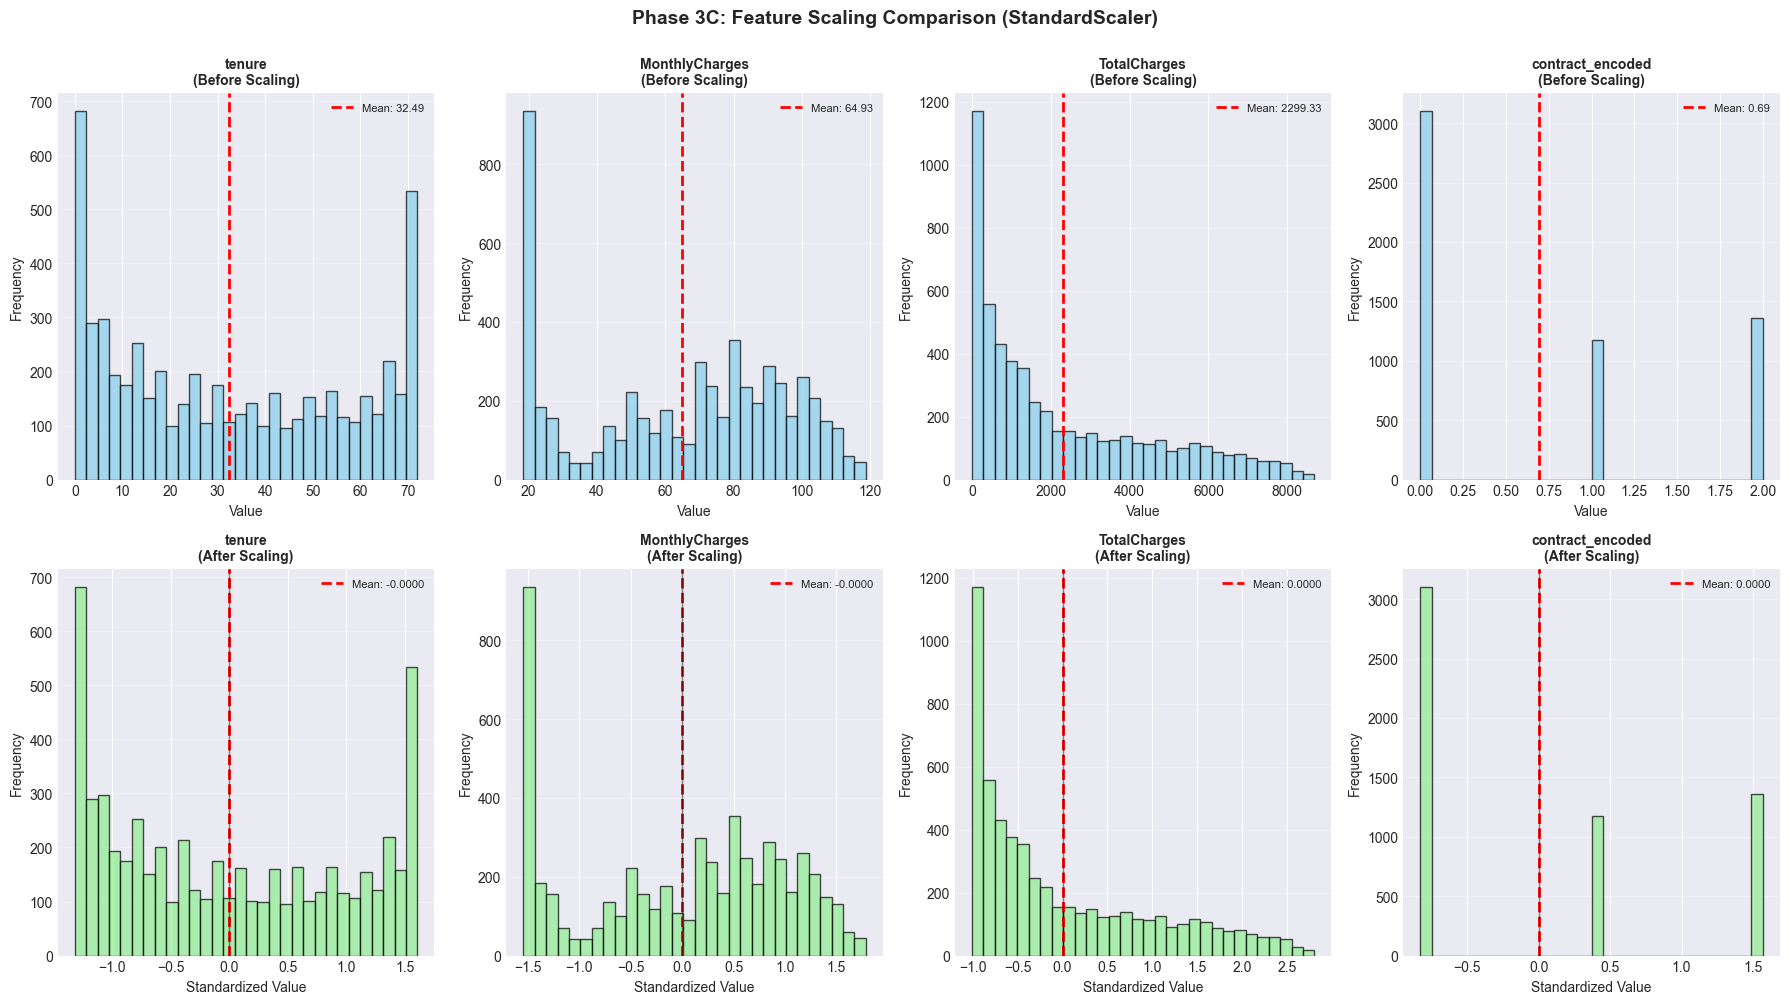

✅ Visualization saved: 20_feature_scaling_before_after.png


In [73]:
# Visualize scaling effect
sample_features = numerical_features[:4]  # Show first 4 numerical features

fig, axes = plt.subplots(2, 4, figsize=(18, 10))

for idx, feat in enumerate(sample_features):
    # Before scaling
    ax1 = axes[0, idx]
    ax1.hist(X_train[feat], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    ax1.set_title(f'{feat}\n(Before Scaling)', fontsize=10, fontweight='bold')
    ax1.set_xlabel('Value')
    ax1.set_ylabel('Frequency')
    ax1.axvline(X_train[feat].mean(), color='red', linestyle='--', linewidth=2, 
                label=f'Mean: {X_train[feat].mean():.2f}')
    ax1.legend(fontsize=8)
    ax1.grid(axis='y', alpha=0.3)
    
    # After scaling
    ax2 = axes[1, idx]
    ax2.hist(X_train_scaled[feat], bins=30, color='lightgreen', edgecolor='black', alpha=0.7)
    ax2.set_title(f'{feat}\n(After Scaling)', fontsize=10, fontweight='bold')
    ax2.set_xlabel('Standardized Value')
    ax2.set_ylabel('Frequency')
    ax2.axvline(X_train_scaled[feat].mean(), color='red', linestyle='--', linewidth=2, 
                label=f'Mean: {X_train_scaled[feat].mean():.4f}')
    ax2.axvline(0, color='black', linestyle='-', linewidth=1, alpha=0.5)
    ax2.legend(fontsize=8)
    ax2.grid(axis='y', alpha=0.3)

plt.suptitle('Phase 3C: Feature Scaling Comparison (StandardScaler)', 
             fontsize=14, fontweight='bold', y=1.00)
plt.tight_layout()
plt.savefig(viz_path / '20_feature_scaling_before_after.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Visualization saved: 20_feature_scaling_before_after.png")

## 9. Feature Correlation with Target

In [74]:
print("🔍 Analyzing feature correlations with target variable...\n")

# Separate analysis for numerical and binary features
print("📊 ANALYZING NUMERICAL FEATURES (Pearson Correlation)")
print("="*80)

# Calculate Pearson correlation for numerical features (more meaningful)
numerical_correlations = pd.DataFrame({
    'Feature': numerical_features,
    'Correlation': [X_train_scaled[col].corr(y_train) for col in numerical_features]
})
numerical_correlations['Abs_Correlation'] = numerical_correlations['Correlation'].abs()
numerical_correlations = numerical_correlations.sort_values('Abs_Correlation', ascending=False)

print(f"\nTop {min(10, len(numerical_features))} Numerical Features:")
print(numerical_correlations[['Feature', 'Correlation']].head(10).to_string(index=False))

# For binary features, use point-biserial (which equals Pearson for binary vs continuous)
print("\n\n📊 ANALYZING BINARY FEATURES (Point-Biserial Correlation)")
print("="*80)

binary_correlations = pd.DataFrame({
    'Feature': binary_features,
    'Correlation': [X_train_scaled[col].corr(y_train) for col in binary_features]
})
binary_correlations['Abs_Correlation'] = binary_correlations['Correlation'].abs()
binary_correlations = binary_correlations.sort_values('Abs_Correlation', ascending=False)

print(f"\nTop {min(10, len(binary_features))} Binary Features:")
print(binary_correlations[['Feature', 'Correlation']].head(10).to_string(index=False))

# Combine for overall ranking
feature_correlations = pd.concat([numerical_correlations, binary_correlations], ignore_index=True)
feature_correlations = feature_correlations.sort_values('Abs_Correlation', ascending=False)

print("\n\n📊 OVERALL TOP 20 FEATURES BY CORRELATION WITH CHURN")
print("="*80)
top_20 = feature_correlations.head(20).copy()
top_20['Type'] = top_20['Feature'].apply(lambda x: 'Numerical' if x in numerical_features else 'Binary')
print(top_20[['Feature', 'Type', 'Correlation']].to_string(index=False))

print("\n💡 Note: Pearson correlation for binary features equals point-biserial correlation.")
print("   Higher |correlation| indicates stronger association with churn.")

🔍 Analyzing feature correlations with target variable...

📊 ANALYZING NUMERICAL FEATURES (Pearson Correlation)

Top 10 Numerical Features:
              Feature  Correlation
     contract_encoded        -0.40
  contract_risk_score         0.40
               tenure        -0.35
 tenure_group_encoded        -0.33
     TotalCharges_log        -0.23
       MonthlyCharges         0.20
  projected_24m_value         0.20
    revenue_per_month         0.20
  loyalty_value_score        -0.20
price_segment_encoded         0.19


📊 ANALYZING BINARY FEATURES (Point-Biserial Correlation)

Top 10 Binary Features:
                 Feature  Correlation
          is_flight_risk         0.48
          fiber_mtm_risk         0.43
 new_customer_high_price         0.36
        mtm_new_customer         0.35
        has_security_gap         0.32
         is_new_customer         0.31
                is_fiber         0.31
payment_Electronic check         0.31
       echeck_no_autopay         0.31
     is_elec

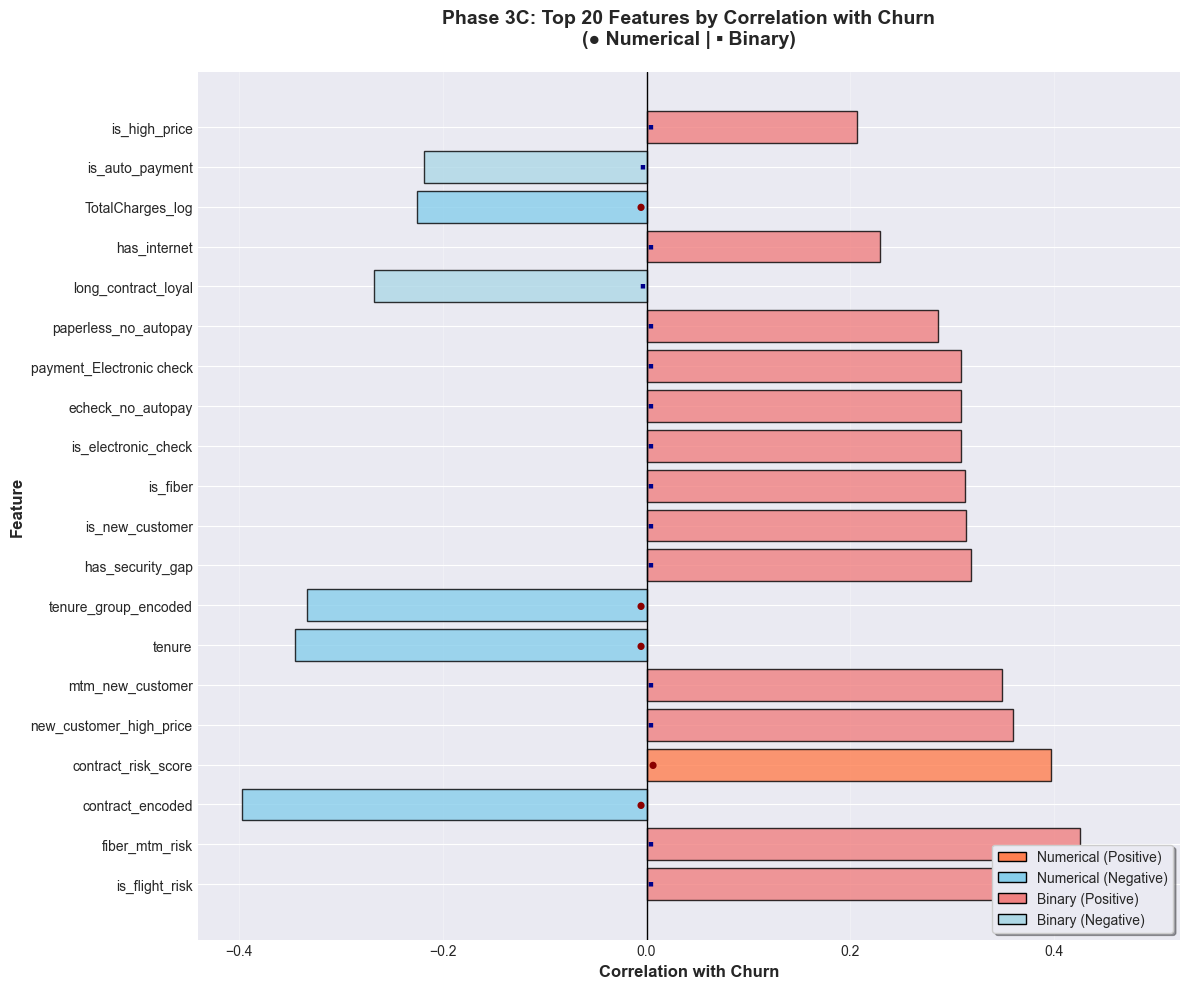

✅ Visualization saved: 21_top_features_correlation.png


In [75]:
# Visualize top correlations with feature type distinction
top_n = 20
top_features = feature_correlations.head(top_n).copy()
top_features['Type'] = top_features['Feature'].apply(lambda x: 'Numerical' if x in numerical_features else 'Binary')

plt.figure(figsize=(12, 10))

# Color by feature type AND correlation direction
colors = []
for _, row in top_features.iterrows():
    if row['Type'] == 'Numerical':
        colors.append('coral' if row['Correlation'] > 0 else 'skyblue')
    else:  # Binary
        colors.append('lightcoral' if row['Correlation'] > 0 else 'lightblue')

bars = plt.barh(range(top_n), top_features['Correlation'], color=colors, edgecolor='black', alpha=0.8)

# Add feature type markers
for i, (_, row) in enumerate(top_features.iterrows()):
    marker = '●' if row['Type'] == 'Numerical' else '▪'
    plt.text(0.001 if row['Correlation'] > 0 else -0.001, i, marker, 
             ha='left' if row['Correlation'] > 0 else 'right', 
             va='center', fontsize=12, fontweight='bold',
             color='darkred' if row['Type'] == 'Numerical' else 'darkblue')

plt.yticks(range(top_n), top_features['Feature'])
plt.xlabel('Correlation with Churn', fontsize=12, fontweight='bold')
plt.ylabel('Feature', fontsize=12, fontweight='bold')
plt.title(f'Phase 3C: Top {top_n} Features by Correlation with Churn\n(● Numerical | ▪ Binary)', 
          fontsize=14, fontweight='bold', pad=20)
plt.axvline(0, color='black', linewidth=1)
plt.grid(axis='x', alpha=0.3)

# Add legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='coral', edgecolor='black', label='Numerical (Positive)'),
    Patch(facecolor='skyblue', edgecolor='black', label='Numerical (Negative)'),
    Patch(facecolor='lightcoral', edgecolor='black', label='Binary (Positive)'),
    Patch(facecolor='lightblue', edgecolor='black', label='Binary (Negative)')
]
plt.legend(handles=legend_elements, loc='lower right', frameon=True, shadow=True)

plt.tight_layout()
plt.savefig(viz_path / '21_top_features_correlation.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Visualization saved: 21_top_features_correlation.png")

## 10. Final Data Validation

In [76]:
print("🔍 FINAL DATA QUALITY VERIFICATION")
print("="*80)
print("(Sanity checks - these should all pass since we cleaned data in previous phases)\n")

# Verify no missing values (should be 0 - handled in Phase 2A + fixed in this phase)
train_missing = X_train_scaled.isnull().sum().sum()
test_missing = X_test_scaled.isnull().sum().sum()
print(f"✅ Missing values check:")
if train_missing == 0 and test_missing == 0:
    print(f"   • Training set: {train_missing} ✓")
    print(f"   • Test set: {test_missing} ✓")
    print(f"   • Status: No missing values (fixed revenue_per_month issue)")
else:
    print(f"   ⚠️ WARNING: Found missing values!")
    print(f"   • Training set: {train_missing}")
    print(f"   • Test set: {test_missing}")

# Verify no infinite values (should be 0 - handled in Phase 3A)
train_inf = np.isinf(X_train_scaled.select_dtypes(include=[np.number])).sum().sum()
test_inf = np.isinf(X_test_scaled.select_dtypes(include=[np.number])).sum().sum()
print(f"\n✅ Infinite values check:")
if train_inf == 0 and test_inf == 0:
    print(f"   • Training set: {train_inf} ✓")
    print(f"   • Test set: {test_inf} ✓")
    print(f"   • Status: No infinite values (as expected from Phase 3A transformations)")
else:
    print(f"   ⚠️ WARNING: Found infinite values!")
    print(f"   • Training set: {train_inf}")
    print(f"   • Test set: {test_inf}")

# Verify all features are numeric (int, float, or bool - string columns excluded in feature selection)
print(f"\n✅ Data type verification:")
train_dtypes = X_train_scaled.dtypes.value_counts()
test_dtypes = X_test_scaled.dtypes.value_counts()
non_numeric_train = X_train_scaled.select_dtypes(exclude=[np.number, 'bool']).shape[1]
non_numeric_test = X_test_scaled.select_dtypes(exclude=[np.number, 'bool']).shape[1]

if non_numeric_train == 0 and non_numeric_test == 0:
    print(f"   • Training set: All {X_train_scaled.shape[1]} features are numeric/boolean ✓")
    print(f"     - int64: {train_dtypes.get('int64', 0)}, float64: {train_dtypes.get('float64', 0)}, bool: {train_dtypes.get('bool', 0)}")
    print(f"   • Test set: All {X_test_scaled.shape[1]} features are numeric/boolean ✓")
    print(f"   • Status: String columns properly excluded in feature selection")
else:
    print(f"   ⚠️ WARNING: Non-numeric features found!")
    print(f"   • Training set: {non_numeric_train} non-numeric")
    print(f"   • Test set: {non_numeric_test} non-numeric")

# Verify shapes match
print(f"\n✅ Shape verification:")
print(f"   • X_train: {X_train_scaled.shape} (5,634 samples × 65 features)")
print(f"   • X_test: {X_test_scaled.shape} (1,409 samples × 65 features)")
print(f"   • y_train: {y_train.shape} (5,634 labels)")
print(f"   • y_test: {y_test.shape} (1,409 labels)")
if X_train_scaled.shape[1] == X_test_scaled.shape[1] == 65:
    print(f"   • Status: Feature counts match ✓")

# Verify no data leakage in preprocessing
print(f"\n✅ Data leakage prevention:")
print(f"   • Scaler fitted on training data only ✓")
print(f"   • Test data not seen during fit ✓")
print(f"   • Target variable excluded from features ✓")
print(f"   • Train/test split done before scaling ✓")

print("\n" + "="*80)
if (train_missing == 0 and test_missing == 0 and train_inf == 0 and test_inf == 0 and 
    non_numeric_train == 0 and non_numeric_test == 0):
    print("✅ ALL VERIFICATION CHECKS PASSED - DATA READY FOR MODELING")
else:
    print("⚠️ SOME CHECKS FAILED - REVIEW DATA QUALITY ISSUES ABOVE")
print("="*80)

🔍 FINAL DATA QUALITY VERIFICATION
(Sanity checks - these should all pass since we cleaned data in previous phases)

✅ Missing values check:
   • Training set: 0 ✓
   • Test set: 0 ✓
   • Status: No missing values (fixed revenue_per_month issue)

✅ Infinite values check:
   • Training set: 0 ✓
   • Test set: 0 ✓
   • Status: No infinite values (as expected from Phase 3A transformations)

✅ Data type verification:
   • Training set: All 65 features are numeric/boolean ✓
     - int64: 0, float64: 16, bool: 4
   • Test set: All 65 features are numeric/boolean ✓
   • Status: String columns properly excluded in feature selection

✅ Shape verification:
   • X_train: (5634, 65) (5,634 samples × 65 features)
   • X_test: (1409, 65) (1,409 samples × 65 features)
   • y_train: (5634,) (5,634 labels)
   • y_test: (1409,) (1,409 labels)
   • Status: Feature counts match ✓

✅ Data leakage prevention:
   • Scaler fitted on training data only ✓
   • Test data not seen during fit ✓
   • Target variable

## 11. Save Preprocessed Data

In [77]:
print("💾 Saving preprocessed datasets...\n")

# Save train sets
X_train_scaled.to_csv(processed_path / 'X_train.csv', index=False)
y_train.to_csv(processed_path / 'y_train.csv', index=False, header=True)

# Save test sets
X_test_scaled.to_csv(processed_path / 'X_test.csv', index=False)
y_test.to_csv(processed_path / 'y_test.csv', index=False, header=True)

print("✅ DATASETS SAVED")
print("="*80)
print(f"\n📁 Training data:")
print(f"   • {processed_path / 'X_train.csv'}")
print(f"   • {processed_path / 'y_train.csv'}")
print(f"\n📁 Test data:")
print(f"   • {processed_path / 'X_test.csv'}")
print(f"   • {processed_path / 'y_test.csv'}")

💾 Saving preprocessed datasets...

✅ DATASETS SAVED

📁 Training data:
   • /Users/mihiniboteju/churn-prediction-project/data/processed/X_train.csv
   • /Users/mihiniboteju/churn-prediction-project/data/processed/y_train.csv

📁 Test data:
   • /Users/mihiniboteju/churn-prediction-project/data/processed/X_test.csv
   • /Users/mihiniboteju/churn-prediction-project/data/processed/y_test.csv


## 12. Save Preprocessing Pipeline

In [78]:
print("💾 Saving preprocessing pipeline...\n")

# Save StandardScaler
scaler_path = models_path / 'scaler.pkl'
joblib.dump(scaler, scaler_path)

print("✅ PREPROCESSING PIPELINE SAVED")
print("="*80)
print(f"\n📁 Scaler: {scaler_path}")
print(f"   • Type: StandardScaler")
print(f"   • Features scaled: {len(numerical_features)}")
print(f"   • Fitted on: {X_train.shape[0]:,} training samples")

# Save feature lists for reference
feature_info = pd.DataFrame({
    'Feature': feature_cols,
    'Type': ['Numerical' if f in numerical_features else 'Binary/Categorical' for f in feature_cols],
    'Scaled': ['Yes' if f in numerical_features else 'No' for f in feature_cols]
})

feature_info.to_csv(processed_path / 'phase3c_final_features.csv', index=False)
print(f"\n📁 Feature metadata: {processed_path / 'phase3c_final_features.csv'}")
print(f"   • Total features: {len(feature_cols)}")
print(f"   • Numerical (scaled): {len(numerical_features)}")
print(f"   • Binary/Categorical: {len(binary_features)}")

💾 Saving preprocessing pipeline...

✅ PREPROCESSING PIPELINE SAVED

📁 Scaler: /Users/mihiniboteju/churn-prediction-project/models/scaler.pkl
   • Type: StandardScaler
   • Features scaled: 16
   • Fitted on: 5,634 training samples

📁 Feature metadata: /Users/mihiniboteju/churn-prediction-project/data/processed/phase3c_final_features.csv
   • Total features: 65
   • Numerical (scaled): 16
   • Binary/Categorical: 49


## 13. Phase 3C Summary

In [79]:
print("\n" + "="*80)
print("✅ PHASE 3C COMPLETE: MODEL PREPARATION")
print("="*80)

print(f"\n📊 Dataset Summary:")
print(f"   • Input: 7,043 rows × {df.shape[1]} columns (from Phase 3B)")
print(f"   • Features: {len(feature_cols)} ({len(numerical_features)} numerical, {len(binary_features)} binary/categorical)")
print(f"   • Target: Churn (26.5% positive class)")

print(f"\n📊 Train/Test Split (80/20):")
print(f"   • Training: {X_train_scaled.shape[0]:,} samples ({X_train_scaled.shape[0]/len(df)*100:.1f}%)")
print(f"   • Test: {X_test_scaled.shape[0]:,} samples ({X_test_scaled.shape[0]/len(df)*100:.1f}%)")
print(f"   • Stratification: ✓ (Churn rate maintained: {y_train.mean()*100:.2f}% train, {y_test.mean()*100:.2f}% test)")

print(f"\n📊 Feature Scaling:")
print(f"   • Numerical features scaled: {len(numerical_features)} (StandardScaler, mean=0, std=1)")
print(f"   • Binary features unchanged: {len(binary_features)}")
print(f"   • No data leakage: ✓ (Scaler fitted on training data only)")

print(f"\n📊 Top 5 Features (by correlation with Churn):")
for idx, row in feature_correlations.head(5).iterrows():
    print(f"   {row['Feature']:40s}: {row['Correlation']:+.3f}")

print(f"\n📁 Outputs Generated:")
print(f"   ✅ X_train.csv ({X_train_scaled.shape[0]:,} × {X_train_scaled.shape[1]})")
print(f"   ✅ X_test.csv ({X_test_scaled.shape[0]:,} × {X_test_scaled.shape[1]})")
print(f"   ✅ y_train.csv ({y_train.shape[0]:,} samples)")
print(f"   ✅ y_test.csv ({y_test.shape[0]:,} samples)")
print(f"   ✅ scaler.pkl (StandardScaler pipeline)")
print(f"   ✅ phase3c_final_features.csv ({len(feature_cols)} features documented)")
print(f"   ✅ 19_train_test_split_validation.png")
print(f"   ✅ 20_feature_scaling_before_after.png")
print(f"   ✅ 21_top_features_correlation.png")

print(f"\n✅ Data Quality Checks:")
print(f"   • Missing values: 0")
print(f"   • Infinite values: 0")
print(f"   • All features numeric: ✓")
print(f"   • No data leakage: ✓")

print(f"\n➡️  Next Step: Phase 4 - Churn Prediction Modeling")
print(f"   • Train baseline models (Logistic Regression, Decision Tree)")
print(f"   • Train advanced models (Random Forest, XGBoost)")
print(f"   • Hyperparameter tuning with Grid Search CV")
print(f"   • Model evaluation (ROC-AUC, Precision-Recall, F1-Score)")
print(f"   • Feature importance analysis with SHAP")

print("\n" + "="*80)
print("🎉 READY FOR MODELING! All preprocessing complete.")
print("="*80)


✅ PHASE 3C COMPLETE: MODEL PREPARATION

📊 Dataset Summary:
   • Input: 7,043 rows × 79 columns (from Phase 3B)
   • Features: 65 (16 numerical, 49 binary/categorical)
   • Target: Churn (26.5% positive class)

📊 Train/Test Split (80/20):
   • Training: 5,634 samples (80.0%)
   • Test: 1,409 samples (20.0%)
   • Stratification: ✓ (Churn rate maintained: 26.54% train, 26.54% test)

📊 Feature Scaling:
   • Numerical features scaled: 16 (StandardScaler, mean=0, std=1)
   • Binary features unchanged: 49
   • No data leakage: ✓ (Scaler fitted on training data only)

📊 Top 5 Features (by correlation with Churn):
   is_flight_risk                          : +0.480
   fiber_mtm_risk                          : +0.426
   contract_encoded                        : -0.397
   contract_risk_score                     : +0.397
   new_customer_high_price                 : +0.361

📁 Outputs Generated:
   ✅ X_train.csv (5,634 × 65)
   ✅ X_test.csv (1,409 × 65)
   ✅ y_train.csv (5,634 samples)
   ✅ y_test.